## Election Data Analysis

### Problem Statement :

**You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.**


### Introduction :

**The dataset consists of data on 1525 voters with 9 variables. We will use modeling techniques to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party. In this report, we will use modeling techniques to try and analyze the recent elections. We will use predictive modeling techniques to draw conclusions and use it to provide our recommendations to the business.**

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # To supress warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

In [2]:
df = pd.read_excel("Election_Data.xlsx")

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [7]:
df.duplicated().sum()

8

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.00000,54.24127,15.70174,24.00000,41.00000,53.00000,67.00000,93.00000
economic.cond.national,1517.00000,3.24522,0.88179,1.00000,3.00000,3.00000,4.00000,5.00000
economic.cond.household,1517.00000,3.13777,0.93107,1.00000,3.00000,3.00000,4.00000,5.00000
Blair,1517.00000,3.33553,1.17477,1.00000,2.00000,4.00000,4.00000,5.00000
Hague,1517.00000,2.74951,1.23248,1.00000,2.00000,2.00000,4.00000,5.00000
Europe,1517.00000,6.74028,3.29904,1.00000,4.00000,6.00000,10.00000,11.00000
political.knowledge,1517.00000,1.54054,1.08442,0.00000,0.00000,2.00000,2.00000,3.00000


In [10]:
df.describe(include= 'object').T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [11]:
df.vote.value_counts(1)

Labour         0.69677
Conservative   0.30323
Name: vote, dtype: float64

In [12]:
df.gender.value_counts(1)

female   0.53263
male     0.46737
Name: gender, dtype: float64

In [13]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**The dataset does not have any null values. We can see that the mean of age is 54 with the highest being 93 and 24 being lowest. Political knowledge has a mean of 1.54 with the highest being 3 which could imply that our voters are not politically well versed. Blair has a slightly better assessment with a mean of 3.33 and Hague with 2.74. The count of labour voters is the most with 70% of the voters for labour party and 30% for conservative party.**

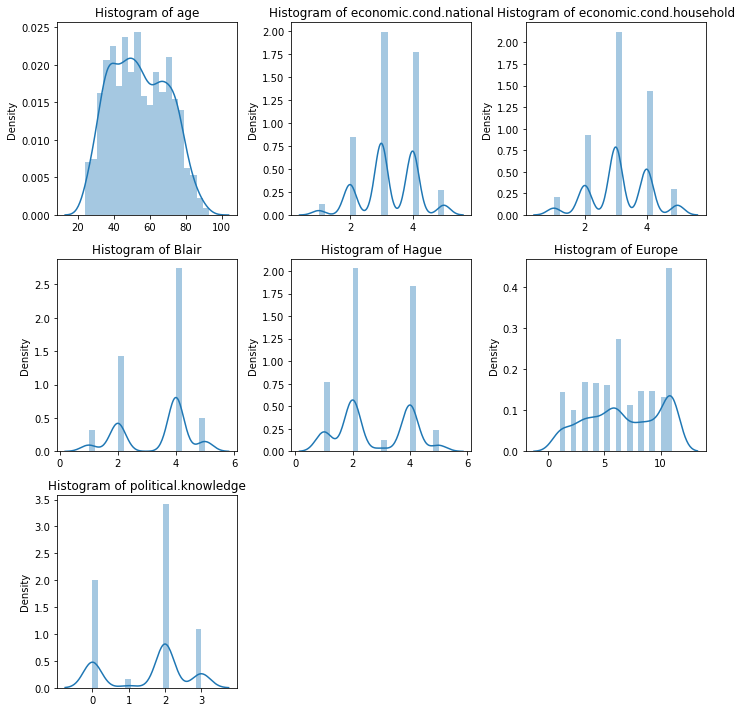

In [14]:
num=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[num]
plt.figure(figsize = (10,10))#Creating histograms for all the variables
feature_list = data_plot.columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.distplot(x = data_plot[feature_list[i]],bins=20)
    plt.title('Histogram of {}'.format(feature_list[i]))
    plt.tight_layout()

**From the above histograms we can see that most of the data highly skewed, only age seems to be moderately distributed. This kind of distribution is expected as most of the variables are ordinal and have a scale rating.**

In [15]:
df.skew()

age                        0.13980
economic.cond.national    -0.23847
economic.cond.household   -0.14415
Blair                     -0.53951
Hague                      0.14619
Europe                    -0.14189
political.knowledge       -0.42293
dtype: float64

**We can see that the many independent variables have a highly skewed distribution.**

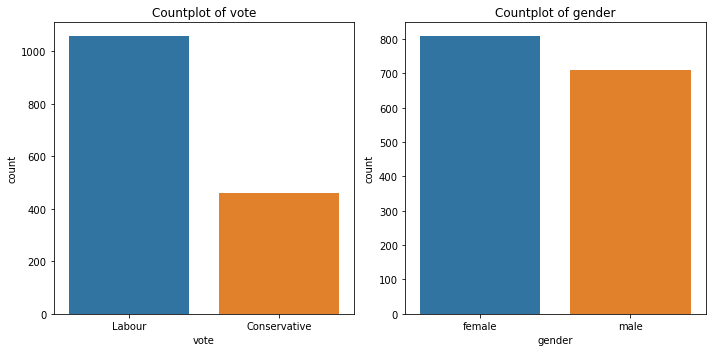

In [16]:
cat=df.dtypes[(df.dtypes=='object')].index
data_plot1=df[cat]
plt.figure(figsize = (10,5))#Creating histograms for all the variables
feature_list = data_plot1.columns
for i in range(len(feature_list)):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x = data_plot1[feature_list[i]])
    plt.title('Countplot of {}'.format(feature_list[i]))
    plt.tight_layout()

**We can see that labour party is preferred compared to the conservative party, it is a 70:30 ratio between labour and conservative. The gender count in the data has more females than males but the difference between them is not very drastic.**

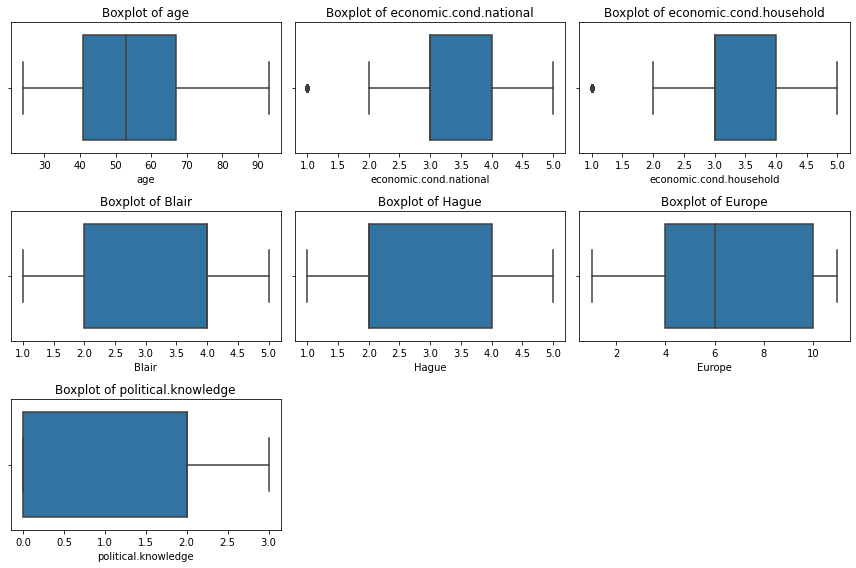

In [17]:
plt.figure(figsize = (12,8))#Creating boxplots for each variable
feature_list = data_plot.columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(x = data_plot[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

**We see outliers presence in the dataset for economic condition national and household but we should only treat outliers if we feel that data is captured incorrectly. We will not perform with outlier treatment and will see the performance of the model to decide whether to do outliers treatment or not.**

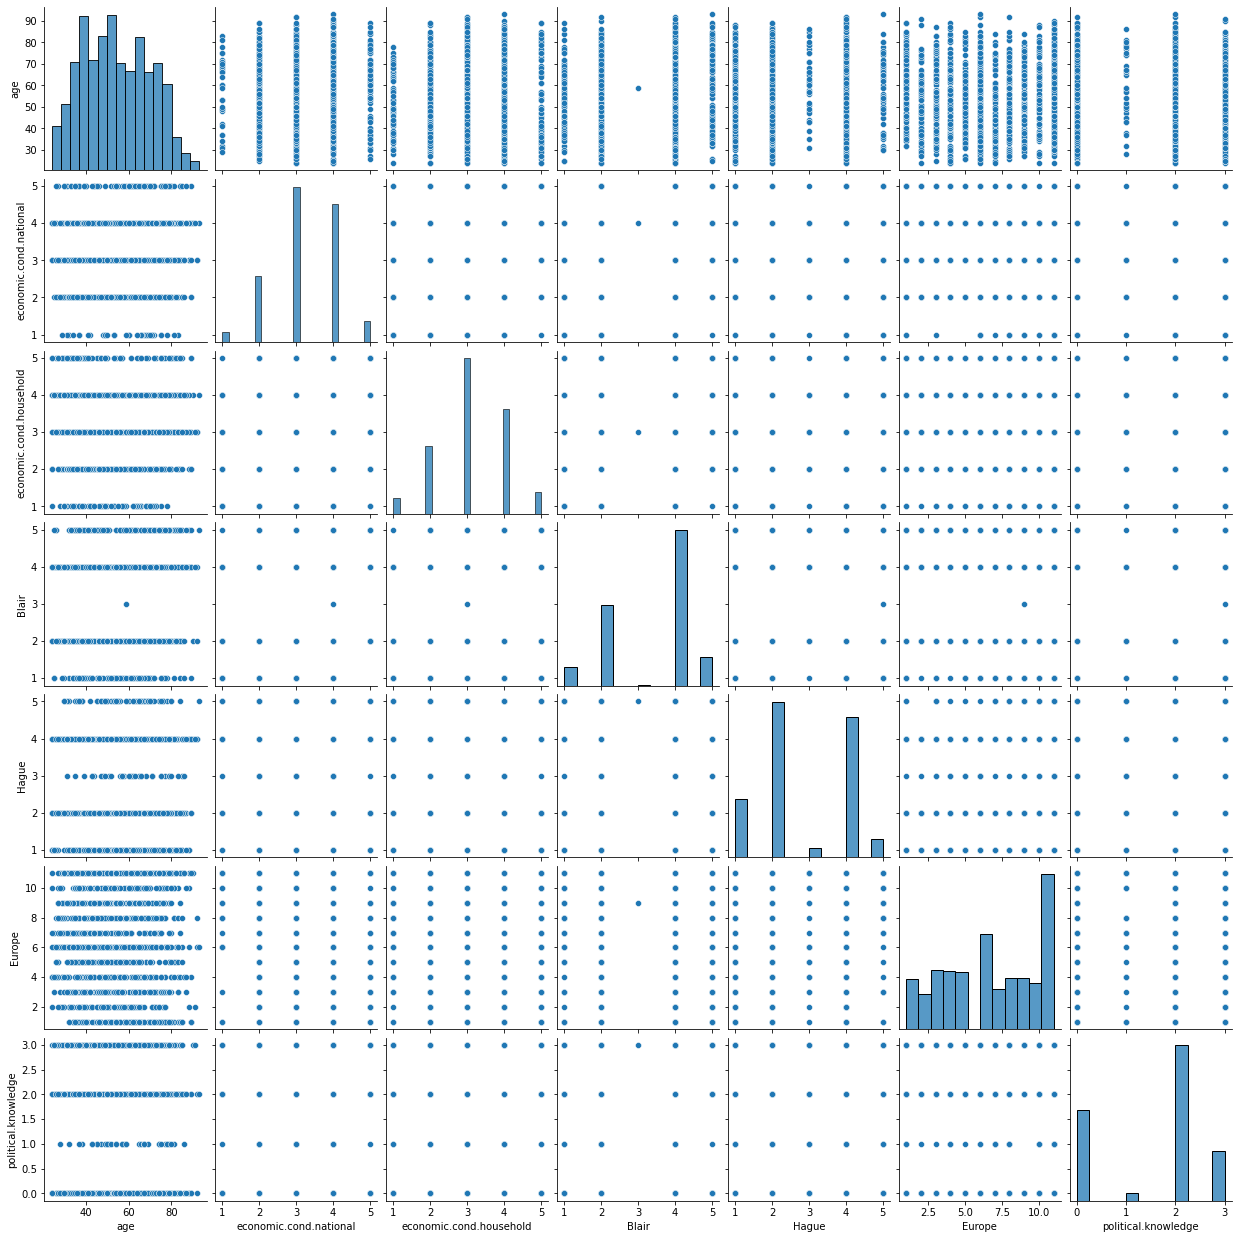

In [18]:
sns.pairplot(df)
plt.show()

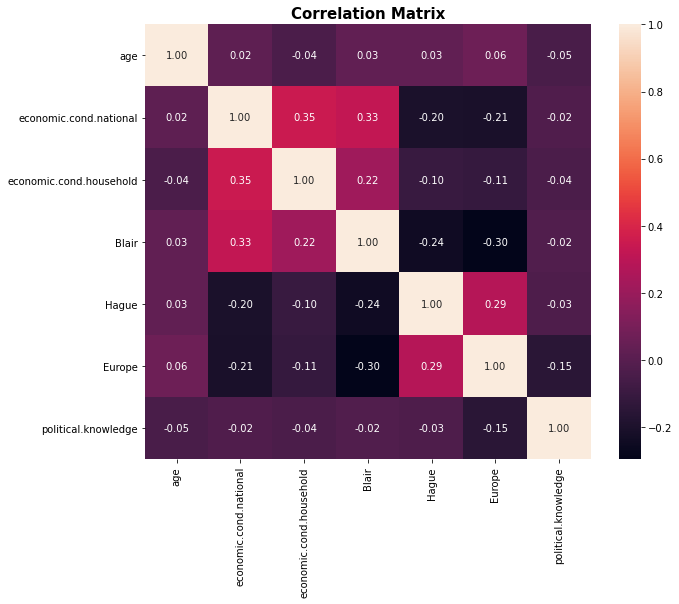

In [19]:
corr = df[num].corr()
fig = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot = True,fmt='.2f')
plt.title("Correlation Matrix", fontsize = 15, fontweight = 'bold')
plt.show()

**The above heatmap doesn't show much correlation between the variables.**

In [20]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


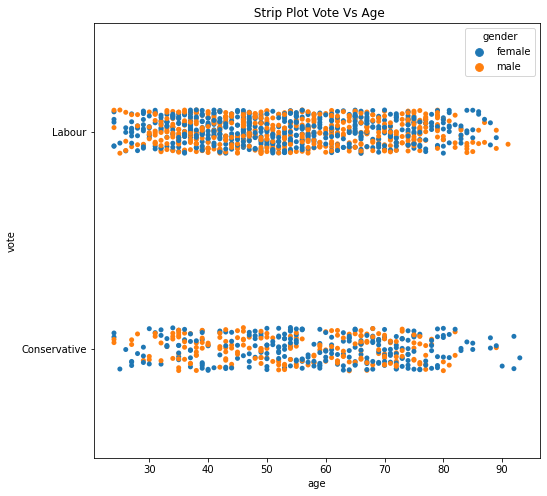

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot(df["age"], df['vote'],hue=df['gender'], jitter=True)
plt.title(" Strip Plot Vote Vs Age")
plt.show()

**We can see that age of the voters gives a slight indication of their choice of candidate as younger voters prefer labour party, we can see females in younger age group have voted for the labour party and females in the older age group have voted for conservative candidate**

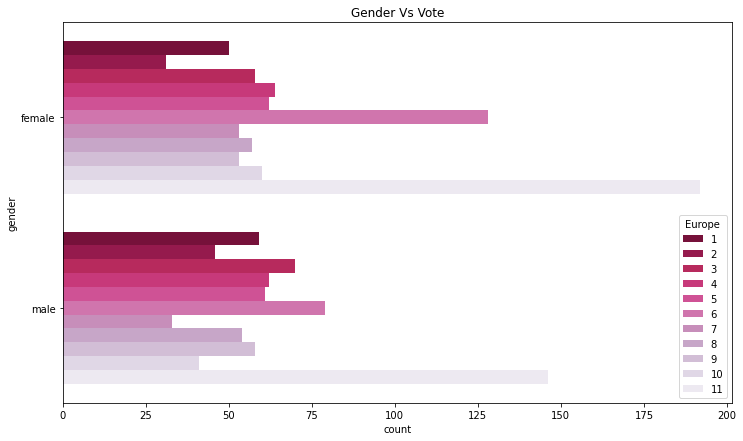

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(y='gender',palette='PuRd_r',hue = 'Europe', data =df, orient ='h' )
plt.title('Gender Vs Vote')
plt.show()

**Females are more eurosceptic than men, men are more neutral or less eurosceptic**

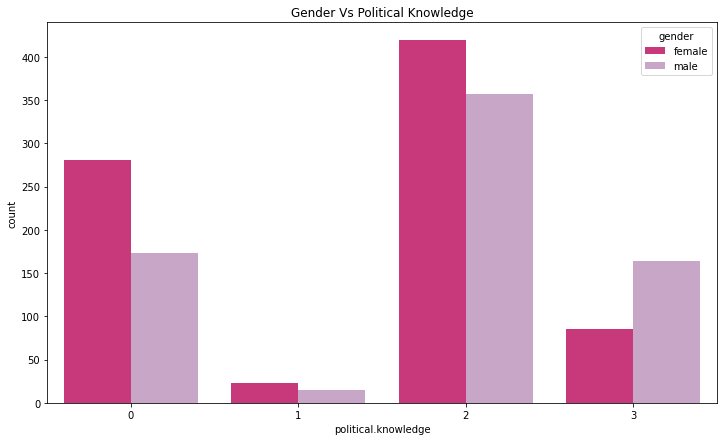

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x='political.knowledge',palette='PuRd_r',hue = 'gender', data =df, orient ='h' )
plt.title('Gender Vs Political Knowledge')
plt.show()

**From the above we can say that there are high number of voters who are politically knowledged, count of men in highly knowledged category is slightly more than women.**

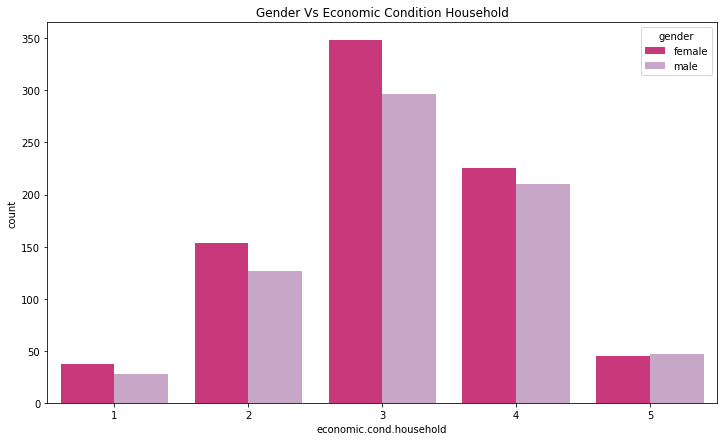

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x='economic.cond.household',palette='PuRd_r',hue = 'gender', data =df, orient ='h' )
plt.title('Gender Vs Economic Condition Household')
plt.show()

**Majority of the voters have a moderate to high economic household condition.**

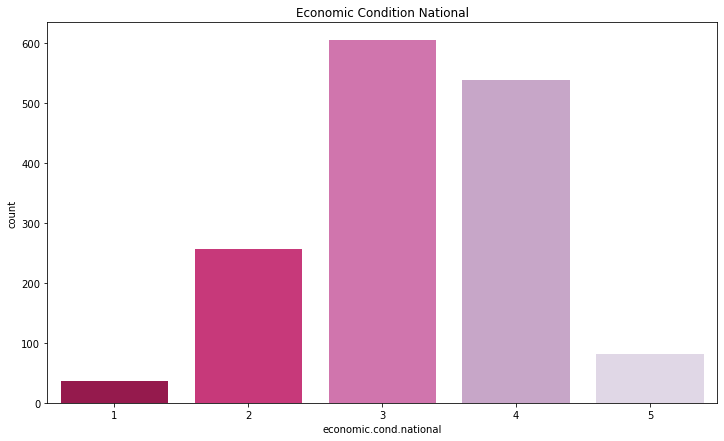

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(x='economic.cond.national',palette='PuRd_r', data =df, orient ='h' )
plt.title('Economic Condition National')
plt.show()

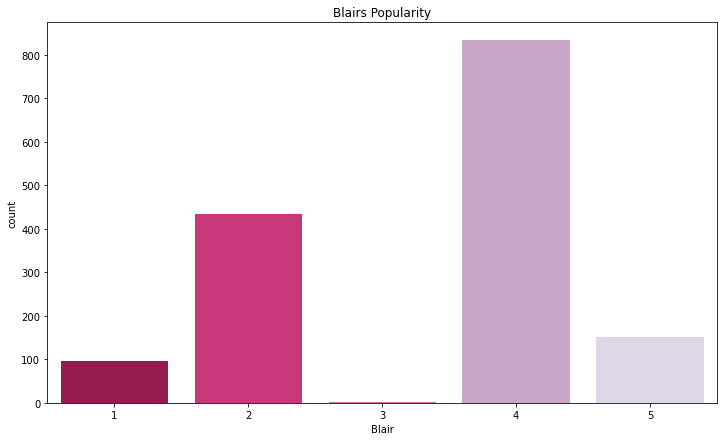

In [243]:
plt.figure(figsize=(12,7))
sns.countplot(x='Blair',palette='PuRd_r' ,data =df, orient ='h' )
plt.title('Blairs Popularity')
plt.show()

In [244]:
df['Blair'].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

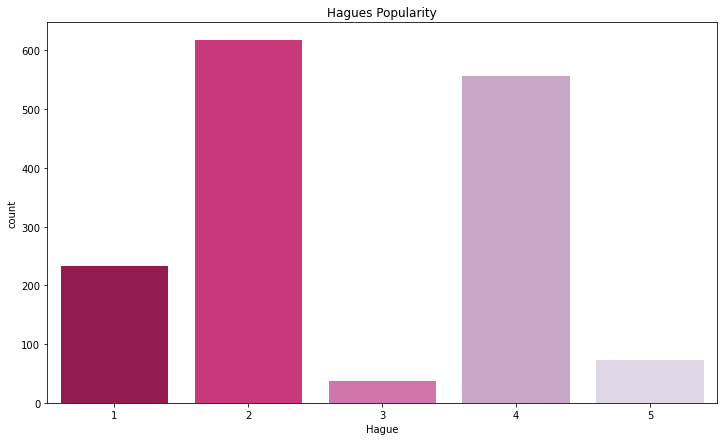

In [242]:
plt.figure(figsize=(12,7))
sns.countplot(x='Hague',palette='PuRd_r' ,data =df, orient ='h' )
plt.title('Hagues Popularity')
plt.show()

In [245]:
df['Hague'].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

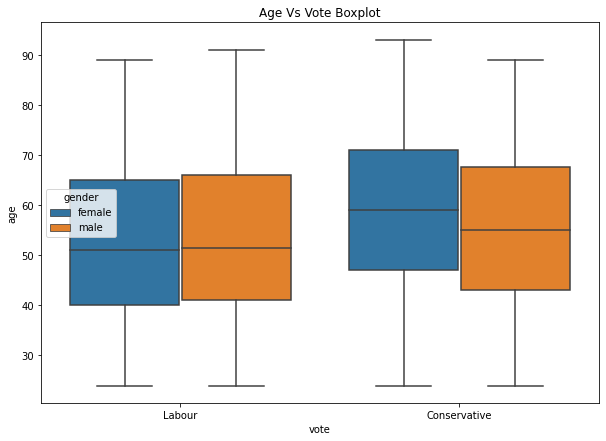

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'vote',y= 'age', hue= 'gender',data = df)
plt.title('Age Vs Vote Boxplot')
plt.show()

In [29]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [30]:
df = pd.get_dummies(df,drop_first = True)

In [31]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


**Scaling is not necessary for LDA & Logistic regression as they can handle different scales. But for KNN we will need to scale the data as it is a distance based model**

### Train Test Split

In [32]:
X = df.drop('vote_Labour', axis = 1)
y = df['vote_Labour']

X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [33]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify = df['vote_Labour'])

In [34]:
y.value_counts()

1    1057
0     460
Name: vote_Labour, dtype: int64

In [35]:
y_train.value_counts()

1    739
0    322
Name: vote_Labour, dtype: int64

**Train & test ratio is of outmost importance as we need to make sure that we are adequate number of observations to train our model and it is equally important to have adequate amount of test data to be able to judge the performance of the model. We have taken 70:30 as the split here, considering we have total 1517 observations and 1062 for train and 455 for test would be a good split to judge the performance of the model. It is also the industry standard.**

### Logistic Regression

In [36]:
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty = 'none', verbose=True, n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

**Predicting on Training and Test dataset**

In [37]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [38]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.19951,0.80049
1,0.61074,0.38926
2,0.08347,0.91653
3,0.03082,0.96918
4,0.13599,0.86401


### AUC ROC - Train

In [39]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.827521206409048

AUC: 0.877


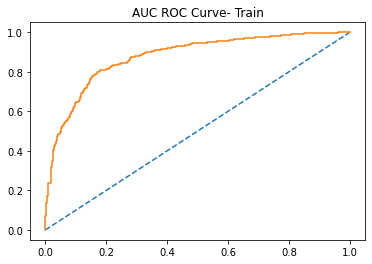

In [40]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Train")
plt.show()

In [41]:
confusion_matrix(y_train, ytrain_predict)

array([[213, 109],
       [ 74, 665]], dtype=int64)

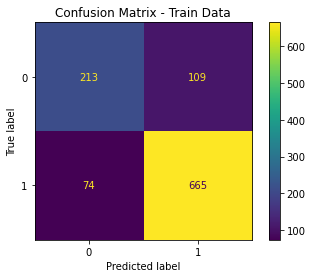

In [42]:
plot_confusion_matrix(model,X_train,y_train)
plt.title("Confusion Matrix - Train Data")
plt.show()

In [43]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



### AUC ROC - Test

In [44]:
model.score(X_test, y_test)

0.8552631578947368

AUC: 0.913


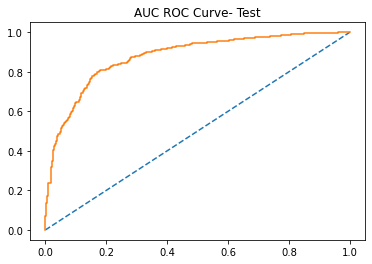

In [45]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Test")
plt.show()

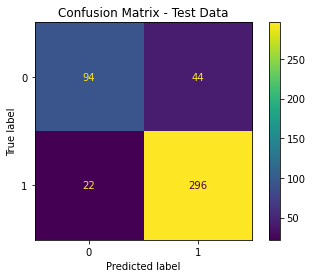

In [46]:
plot_confusion_matrix(model,X_test,y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

In [47]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



### Linear Discriminant Analysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [49]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [50]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [51]:
ytest_predict_prob1=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.16534,0.83466
1,0.65876,0.34124
2,0.07501,0.92499
3,0.01962,0.98038
4,0.11837,0.88163


### AUC ROC - Train

In [52]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.822808671065033

AUC: 0.877


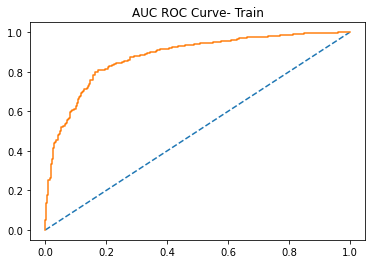

In [53]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Train")
plt.show()

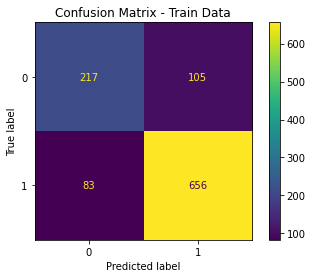

In [54]:
plot_confusion_matrix(model,X_train,y_train)
plt.title("Confusion Matrix - Train Data")
plt.show()

In [55]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



### AUC ROC - Test

In [56]:
# Accuracy - Training Data
model.score(X_test, y_test)

0.8530701754385965

AUC: 0.914


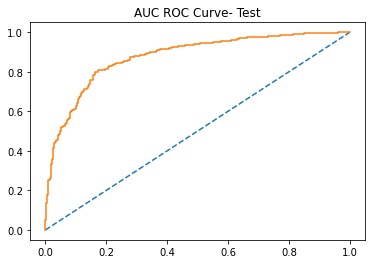

In [57]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Test")
plt.show()

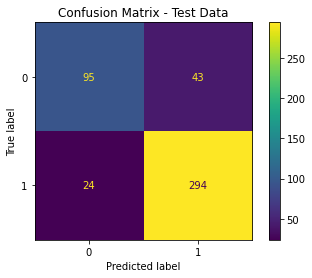

In [58]:
plot_confusion_matrix(model,X_test,y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

In [59]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



### Gaussian Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

### Performance Matrix on train data set

In [62]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

In [63]:
ytest_predict_prob1=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.22376,0.77624
1,0.85581,0.14419
2,0.03708,0.96292
3,0.01102,0.98898
4,0.04330,0.95670


### AUC ROC - Train

In [64]:
# Accuracy - Training Data
NB_model.score(X_train, y_train)

0.8199811498586239

AUC: 0.873


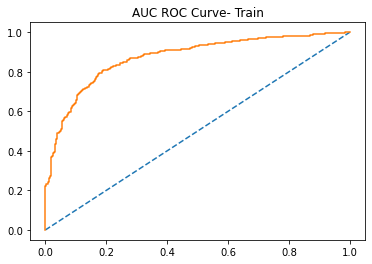

In [65]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Train")
plt.show()

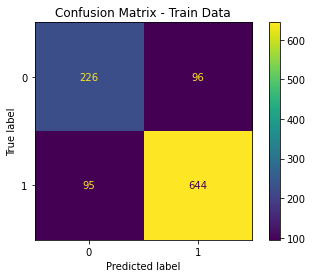

In [66]:
plot_confusion_matrix(NB_model,X_train,y_train)
plt.title("Confusion Matrix - Train Data")
plt.show()

In [67]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



### AUC ROC - Test

In [68]:
# Accuracy - Training Data
NB_model.score(X_test, y_test)

0.8574561403508771

AUC: 0.912


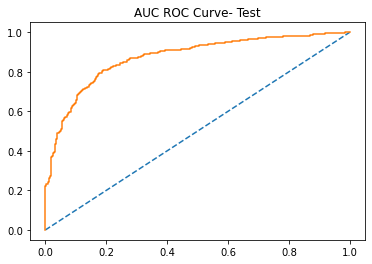

In [69]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Test")
plt.show()

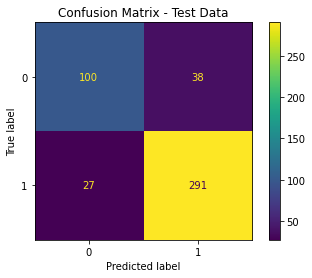

In [70]:
plot_confusion_matrix(NB_model,X_test,y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

In [71]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



### KNN

In [72]:
X1 = X.copy()

In [73]:
y1 = y.copy()

In [74]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1, stratify = df['vote_Labour'])

In [75]:
from scipy.stats import zscore

In [76]:
X1[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_male']]= X1[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_male']].apply(zscore)

In [77]:
X1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.00000,0.00000,1.00033,-1.92662,-0.84358,-0.07908,0.81284,2.46925
economic.cond.national,1517.00000,-0.00000,1.00033,-2.54704,-0.27819,-0.27819,0.85624,1.99067
economic.cond.household,1517.00000,-0.00000,1.00033,-2.29680,-0.14802,-0.14802,0.92637,2.00076
Blair,1517.00000,-0.00000,1.00033,-1.98873,-1.13722,0.56580,0.56580,1.41731
Hague,1517.00000,0.00000,1.00033,-1.41997,-0.60833,-0.60833,1.01495,1.82659
Europe,1517.00000,0.00000,1.00033,-1.74056,-0.83090,-0.22447,0.98841,1.29163
political.knowledge,1517.00000,-0.00000,1.00033,-1.42108,-1.42108,0.42383,0.42383,1.34629
gender_male,1517.00000,0.00000,1.00033,-0.93674,-0.93674,-0.93674,1.06754,1.06754


In [78]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X1_train,y1_train)

KNeighborsClassifier()

In [79]:
ytrain_predict = KNN_model.predict(X1_train)
ytest_predict = KNN_model.predict(X1_test)

In [80]:
# Accuracy - Training Data
KNN_model.score(X1_train, y1_train)

0.8491988689915174

AUC: 0.918


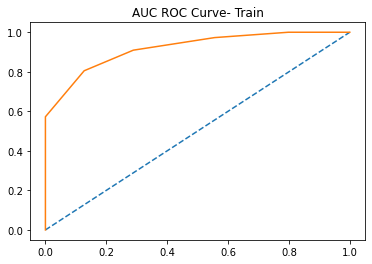

In [81]:
# predict probabilities
probs = KNN_model.predict_proba(X1_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y1_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Train")
plt.show()

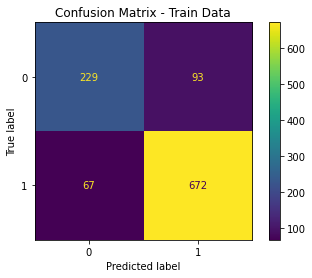

In [82]:
plot_confusion_matrix(KNN_model,X1_train,y1_train)
plt.title("Confusion Matrix - Train Data")
plt.show()

In [83]:
print(classification_report(y1_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [84]:
# Accuracy - Training Data
KNN_model.score(X1_test, y1_test)

0.8070175438596491

AUC: 0.860


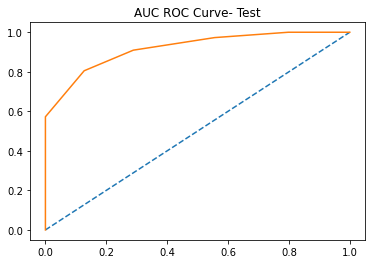

In [85]:
# predict probabilities
probs = KNN_model.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.title("AUC ROC Curve- Test")
plt.show()

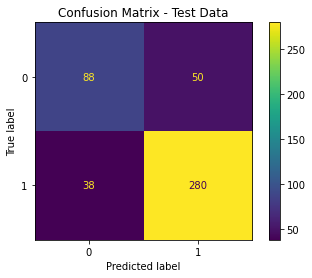

In [86]:
plot_confusion_matrix(KNN_model,X1_test,y1_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

In [87]:
print(classification_report(y1_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       138
           1       0.85      0.88      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



### Grid Search CV for Logistic Regression

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid = {'penalty': ['l2', 'none','l1'],
       'solver':['sag','lbfgs','newton-cg'],
       'tol':[0.0001,0.00001],
       'max_iter':[100,1000,10000]}

In [90]:
model = LogisticRegression()

In [91]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs = -1)

In [92]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]})

In [93]:
print(grid_search.best_params_,'\n'),
print(grid_search.best_estimator_)

{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression()


In [94]:
best_model = grid_search.best_estimator_

In [95]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [96]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.20068,0.79932
1,0.60781,0.39219
2,0.08475,0.91525
3,0.03141,0.96859
4,0.13646,0.86354


### Performance matrix train 

In [97]:
best_model.score(X_train, y_train)

0.8284637134778511

AUC: 0.877


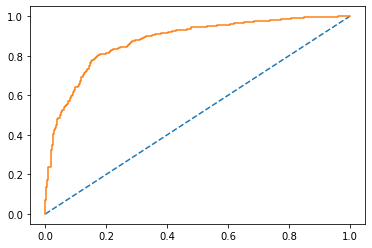

In [98]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [99]:
confusion_matrix(y_train, ytrain_predict)

array([[213, 109],
       [ 73, 666]], dtype=int64)

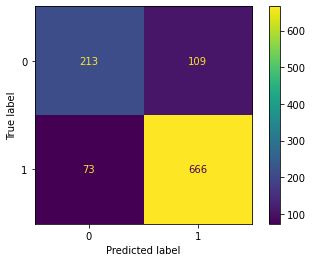

In [100]:
plot_confusion_matrix(best_model,X_train,y_train);

In [101]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061



### Performance index test

In [102]:
best_model.score(X_test, y_test)

0.8530701754385965

AUC: 0.913


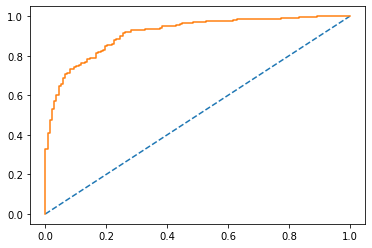

In [103]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

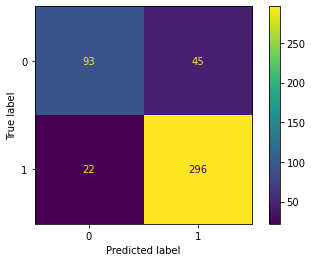

In [104]:
plot_confusion_matrix(best_model,X_test,y_test);

In [105]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.67      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456



In [106]:
from matplotlib import pyplot

Feature: 0, Score: -0.01332
Feature: 1, Score: 0.34479
Feature: 2, Score: 0.03326
Feature: 3, Score: 0.55077
Feature: 4, Score: -0.85453
Feature: 5, Score: -0.20775
Feature: 6, Score: -0.40337
Feature: 7, Score: 0.05115


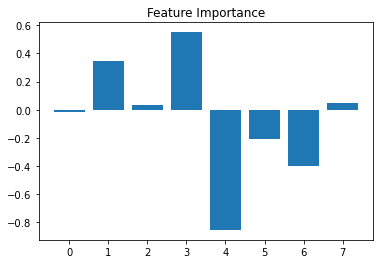

In [107]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
pyplot.show()

### Grid Search CV for LDA

In [108]:
grid = {'solver': ['svd', 'lsqr','eigen'],
       'shrinkage':[0,0.01,1],
       'tol':[0.0001,0.00001]}

In [109]:
clf = LinearDiscriminantAnalysis()

In [110]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid, cv=3, n_jobs = -1)

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [0, 0.01, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [112]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 0.01, 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage=0.01, solver='lsqr')


In [113]:
best_model = grid_search.best_estimator_

In [114]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

### Performance matrix train

In [115]:
best_model.score(X_train, y_train)

0.8265786993402451

AUC: 0.876


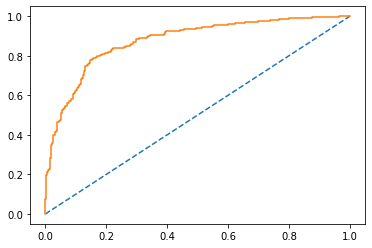

In [116]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


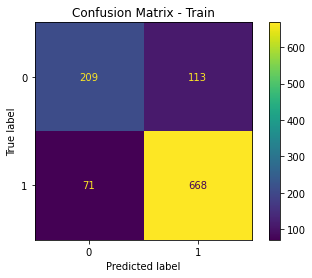

In [117]:
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('Confusion Matrix - Train')
plt.show()

In [118]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



### Performance index test

In [119]:
best_model.score(X_test, y_test)

0.8552631578947368

AUC: 0.915


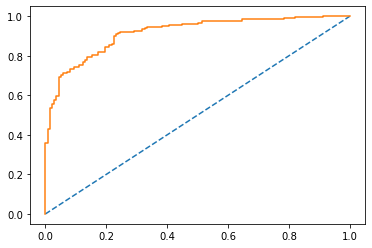

In [120]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

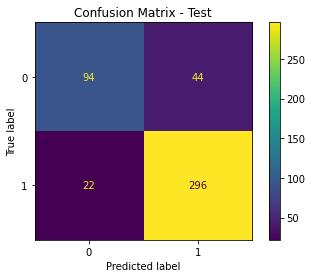

In [121]:
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('Confusion Matrix - Test')
plt.show()

In [122]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



Feature: 0, Score: -0.01606
Feature: 1, Score: 0.28390
Feature: 2, Score: 0.07546
Feature: 3, Score: 0.55009
Feature: 4, Score: -0.77320
Feature: 5, Score: -0.22624
Feature: 6, Score: -0.36046
Feature: 7, Score: 0.00559


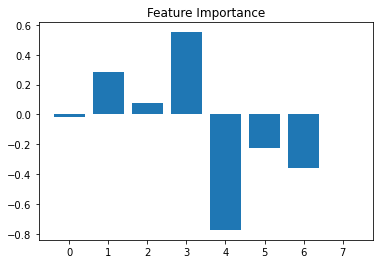

In [123]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
pyplot.show()

### Grid Search CV for NB

In [124]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [125]:
NB_model = GaussianNB()

In [126]:
grid_search = GridSearchCV(estimator = NB_model, param_grid = param_grid_nb, cv = 3, n_jobs = -2)

In [127]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-2,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [128]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'var_smoothing': 0.0023101297000831605} 

GaussianNB(var_smoothing=0.0023101297000831605)


In [129]:
best_model = grid_search.best_estimator_

In [130]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

### Performance Matrix Train

In [131]:
best_model.score(X_train, y_train)

0.8199811498586239

AUC: 0.871


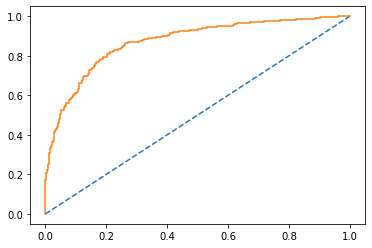

In [132]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

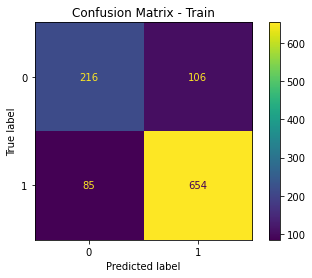

In [133]:
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('Confusion Matrix - Train')
plt.show()

In [134]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       322
           1       0.86      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.78      1061
weighted avg       0.82      0.82      0.82      1061



In [135]:
### Performance Matrix Test

In [136]:
best_model.score(X_test, y_test)

0.8486842105263158

AUC: 0.910


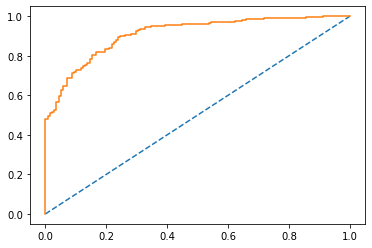

In [137]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

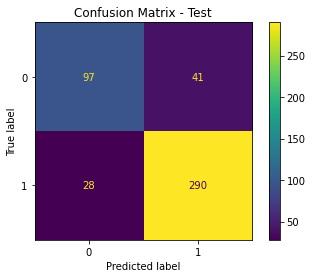

In [138]:
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('Confusion Matrix - Test')
plt.show()

In [139]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



### Grid Search CV for Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
param_grid = {'max_depth':[3,6],
               'max_features':[3,5],
               'min_samples_leaf': [3,15,30],
              'min_samples_split':[30,50],
              'n_estimators':[50,100,150]}

In [142]:
rfr = RandomForestClassifier(random_state=1)

In [143]:
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [144]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 6], 'max_features': [3, 5],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50],
                         'n_estimators': [50, 100, 150]})

In [145]:
print(grid_search.best_params_,'\n'),
print(grid_search.best_estimator_)

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 50, 'n_estimators': 50} 

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=3,
                       min_samples_split=50, n_estimators=50, random_state=1)


In [146]:
best_model = grid_search.best_estimator_

In [147]:
rf=pd.DataFrame(best_model.feature_importances_,index=X_train.columns).sort_values(by=0, ascending=False)
rf

,0
Hague,0.39307
Blair,0.19950
Europe,0.18263
political.knowledge,0.12362
age,0.04573
economic.cond.national,0.04134
economic.cond.household,0.01206
gender_male,0.00205


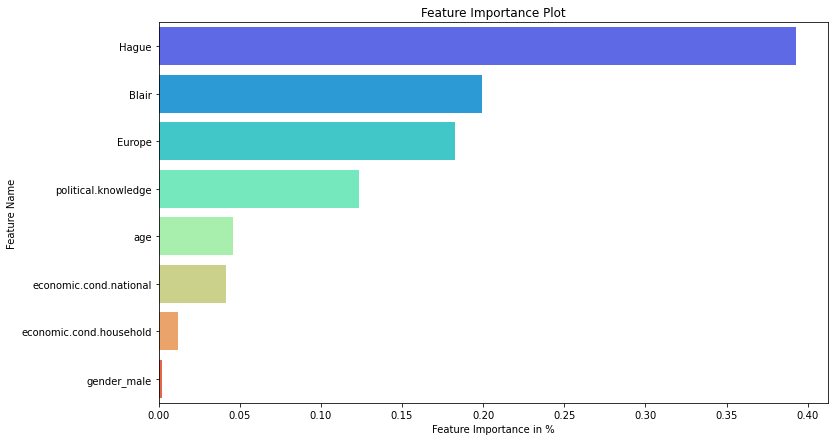

In [148]:
plt.figure(figsize=(12,7))
sns.barplot(rf[0],rf.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [149]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

### Performance Matrix Train

In [150]:
best_model.score(X_train, y_train)

0.8473138548539114

AUC: 0.914


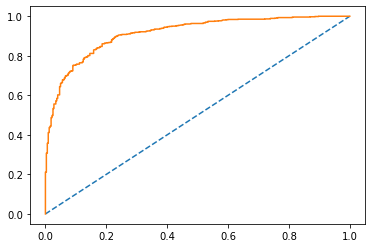

In [151]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

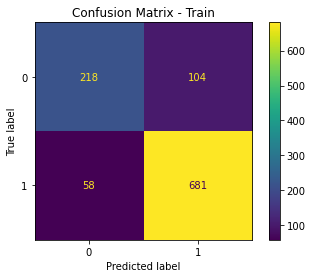

In [152]:
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('Confusion Matrix - Train')
plt.show()

In [153]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       322
           1       0.87      0.92      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



### Performance Matrix Test

In [154]:
best_model.score(X_test, y_test)

0.8399122807017544

AUC: 0.909


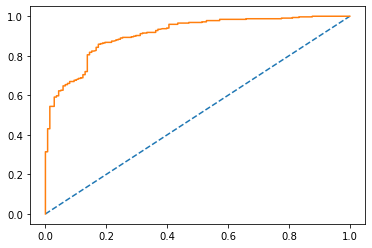

In [155]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

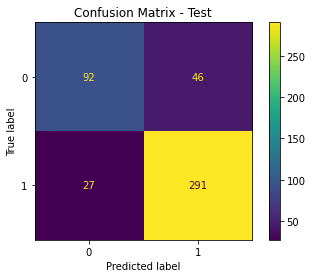

In [156]:
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('Confusion Matrix - Test')
plt.show()

In [157]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



### Best k value for KNN

In [158]:
ac_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X1_train, y1_train)
    scores = knn.score(X1_test,y1_test)
    ac_scores.append(scores)
    
MCE = [1- x for x in ac_scores]
MCE

[0.22587719298245612,
 0.19298245614035092,
 0.19298245614035092,
 0.17105263157894735,
 0.16885964912280704,
 0.16885964912280704,
 0.16228070175438591,
 0.1557017543859649,
 0.1578947368421053,
 0.16228070175438591]

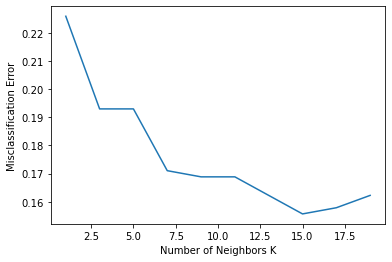

In [159]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [160]:
KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=15)

In [161]:
ytrain_predict = KNN_model.predict(X1_train)
ytest_predict = KNN_model.predict(X1_test)

### Performance Metrics Train

In [162]:
KNN_model.score(X1_train, y1_train)

0.8199811498586239

AUC: 0.888


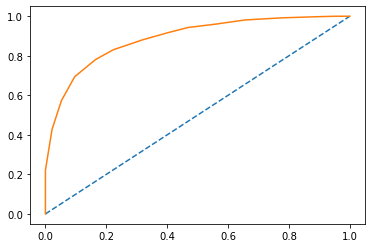

In [163]:
# predict probabilities
probs = KNN_model.predict_proba(X1_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y1_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

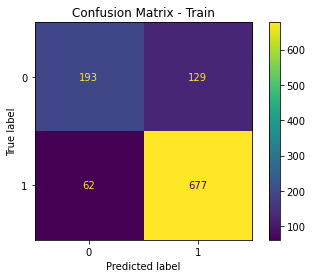

In [164]:
plot_confusion_matrix(KNN_model,X1_train,y1_train)
plt.title('Confusion Matrix - Train')
plt.show()

In [165]:
print(classification_report(y1_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       322
           1       0.84      0.92      0.88       739

    accuracy                           0.82      1061
   macro avg       0.80      0.76      0.77      1061
weighted avg       0.81      0.82      0.81      1061



In [166]:
### Performance Metrics Test

In [167]:
KNN_model.score(X1_test, y1_test)

0.8442982456140351

AUC: 0.895


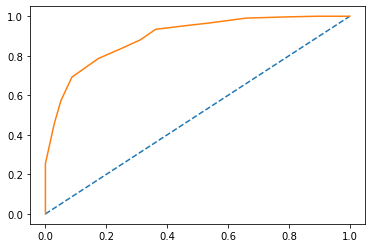

In [168]:
# predict probabilities
probs = KNN_model.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

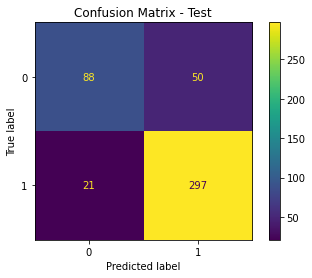

In [169]:
plot_confusion_matrix(KNN_model,X1_test,y1_test)
plt.title('Confusion Matrix - Test')
plt.show()

In [170]:
print(classification_report(y1_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       138
           1       0.86      0.93      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



## Boosting

In [171]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [172]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8491988689915174
[[228  94]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.904


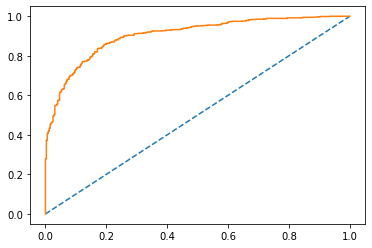

In [173]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

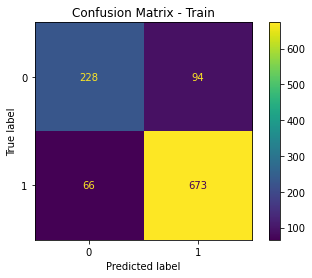

In [174]:
plot_confusion_matrix(ADB_model,X_train,y_train)
plt.title('Confusion Matrix - Train')
plt.show()

In [175]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[ 95  43]
 [ 32 286]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       138
           1       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.908


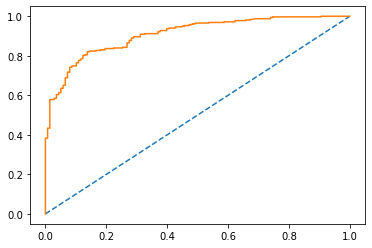

In [176]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

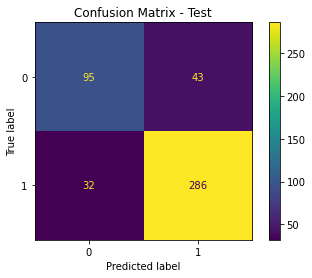

In [177]:
plot_confusion_matrix(ADB_model,X_test,y_test)
plt.title('Confusion Matrix - Test')
plt.show()

### Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

AUC: 0.947


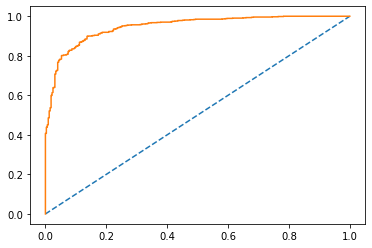

In [179]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

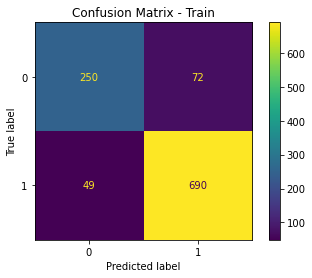

In [180]:
plot_confusion_matrix(gbcl,X_train,y_train)
plt.title('Confusion Matrix - Train')
plt.show()

In [181]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.885956644674835
[[250  72]
 [ 49 690]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [182]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.904


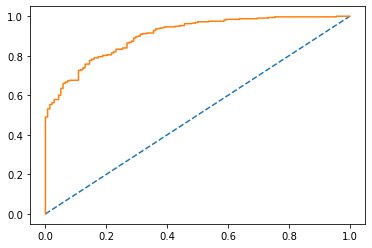

In [183]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

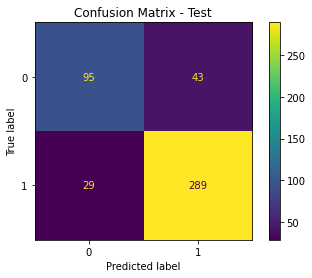

In [184]:
plot_confusion_matrix(gbcl,X_test,y_test)
plt.title('Confusion Matrix - Test')
plt.show()

### Bagging

In [185]:
from sklearn.ensemble import BaggingClassifier

In [186]:
rfr = RandomForestClassifier(n_estimators=50, random_state=1)

In [187]:
Bagging_model=BaggingClassifier(base_estimator=rfr)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50,
                                                        random_state=1))

AUC: 0.995


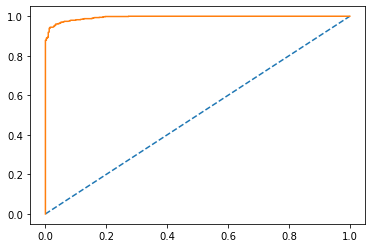

In [188]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [189]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9557021677662583
[[290  32]
 [ 15 724]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       322
           1       0.96      0.98      0.97       739

    accuracy                           0.96      1061
   macro avg       0.95      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



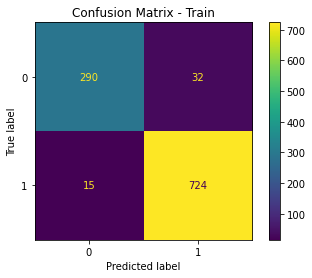

In [190]:
plot_confusion_matrix(Bagging_model,X_train,y_train)
plt.title('Confusion Matrix - Train')
plt.show()

AUC: 0.909


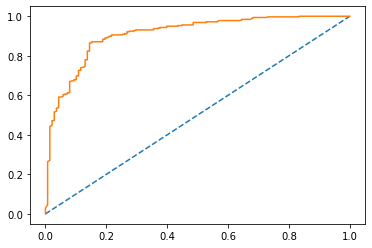

In [191]:
#predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [192]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8618421052631579
[[ 98  40]
 [ 23 295]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



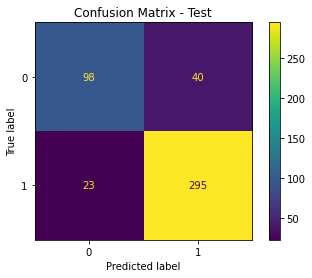

In [193]:
plot_confusion_matrix(Bagging_model,X_test,y_test)
plt.title('Confusion Matrix - Test')
plt.show()

### Conclusion

____________

# Text Analytics 

## Problem Statement

**In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:**

**President Franklin D. Roosevelt in 1941**

**President John F. Kennedy in 1961**

**President Richard Nixon in 1973**


## Introduction

**In this project we are going to work on the inaugural corpora from the ntlk in pythin and analyze the speeches of famous presidents of the U.S.A. We will be using text analytics techniques to better understand the meaning of the speeches and its key components.**

In [194]:
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [195]:
Roosevelt  = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [196]:
Speech = (Roosevelt, Kennedy, Nixon)
Author  =("Roosevelt","Kennedy","Nixon" )

In [197]:
ta = pd.DataFrame({"Speech":Speech, "Author": Author})

In [198]:
ta.head()

,Speech,Author
0,On each national day of inauguration since 178...,Roosevelt
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon


In [199]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Speech  3 non-null      object
 1   Author  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [200]:
ta["char_count"] = ta["Speech"].str.len()
ta[["Speech","char_count"]].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [201]:
ta["word_count"] = ta["Speech"].apply(lambda x: len(str(x).split(" ")))
ta[["Speech","word_count"]].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [202]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [203]:
from nltk.tokenize import sent_tokenize

In [204]:
Roosevelt  = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [205]:
ros = sent_tokenize(Roosevelt)
ken = sent_tokenize(Kennedy)
nix = sent_tokenize(Nixon)
print("Number of sentences in Roosevelts speech is",len(ros))
print("Number of sentences in Kennedys speech is",len(ken))
print("Number of sentences in Nixons speech is",len(nix))

Number of sentences in Roosevelts speech is 68
Number of sentences in Kennedys speech is 52
Number of sentences in Nixons speech is 68


### Pre processing

### Converting to lower case 

In [206]:
ta["Speech"] = ta["Speech"].apply(lambda x: " ". join(x.lower() for x in x.split()))
ta

,Speech,Author,char_count,word_count
0,on each national day of inauguration since 178...,Roosevelt,7571,1323
1,"vice president johnson, mr. speaker, mr. chief...",Kennedy,7618,1364
2,"mr. vice president, mr. speaker, mr. chief jus...",Nixon,9991,1769


### Removing Punctuations

In [207]:
ta["Speech"] = ta["Speech"].str.replace('[^\w\s]','')
ta["Speech"].head()

0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [210]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
ta["Speech"] = ta["Speech"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ta["Speech"].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [211]:
ta[["Speech"]]

,Speech
0,national day inauguration since 1789 people re...
1,vice president johnson mr speaker mr chief jus...
2,mr vice president mr speaker mr chief justice ...


In [212]:
ta["word_count_post_removal"] = ta["Speech"].apply(lambda x: len(str(x).split(" ")))
ta[["Speech","word_count_post_removal"]].head()

,Speech,word_count_post_removal
0,national day inauguration since 1789 people re...,627
1,vice president johnson mr speaker mr chief jus...,693
2,mr vice president mr speaker mr chief justice ...,833


In [213]:
ta.head()

,Speech,Author,char_count,word_count,word_count_post_removal
0,national day inauguration since 1789 people re...,Roosevelt,7571,1323,627
1,vice president johnson mr speaker mr chief jus...,Kennedy,7618,1364,693
2,mr vice president mr speaker mr chief justice ...,Nixon,9991,1769,833


In [215]:
roosevelt = pd.Series(' '.join(ta["Speech"]).split()).value_counts()[:10]
roosevelt

us            46
let           39
world         27
new           26
peace         23
america       22
nation        21
nations       15
government    14
freedom       14
dtype: int64

In [246]:
stop = ('us','let', 'know')
ta["Speech"] = ta["Speech"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ta["Speech"].head()

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [247]:
roosevelt = pd.Series(''.join(ta["Speech"][0]).split()).value_counts()
roosevelt[:3]

nation       11
democracy     9
spirit        9
dtype: int64

In [233]:
kennedy = pd.Series(''.join(ta["Speech"][1]).split()).value_counts()
kennedy[:3]

world     8
sides     8
pledge    7
dtype: int64

In [234]:
nixon = pd.Series(''.join(ta["Speech"][2]).split()).value_counts()
nixon[:3]

peace    19
world    16
new      15
dtype: int64

In [229]:
!pip install wordcloud
from wordcloud import WordCloud

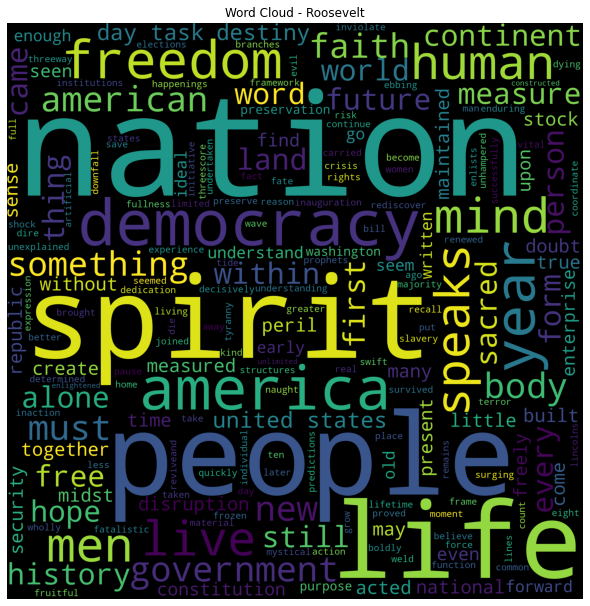

In [249]:
# Word Cloud 
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(ta["Speech"][0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.title("Word Cloud - Roosevelt")
plt.show()

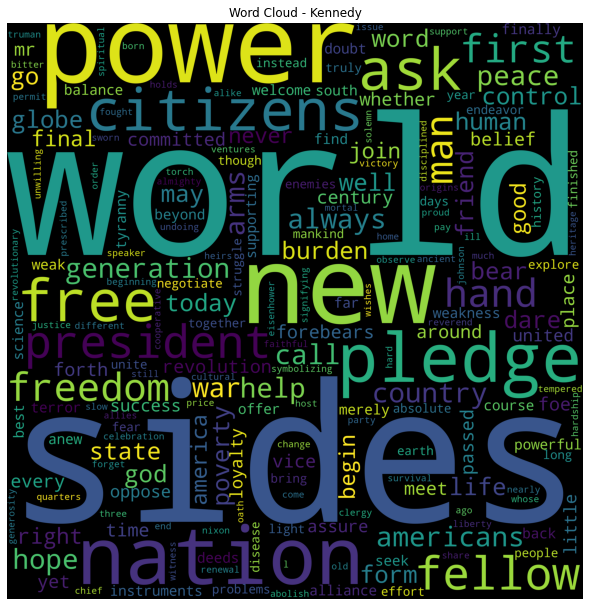

In [248]:
# Word Cloud 
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(ta["Speech"][1])
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.title("Word Cloud - Kennedy")
plt.show()

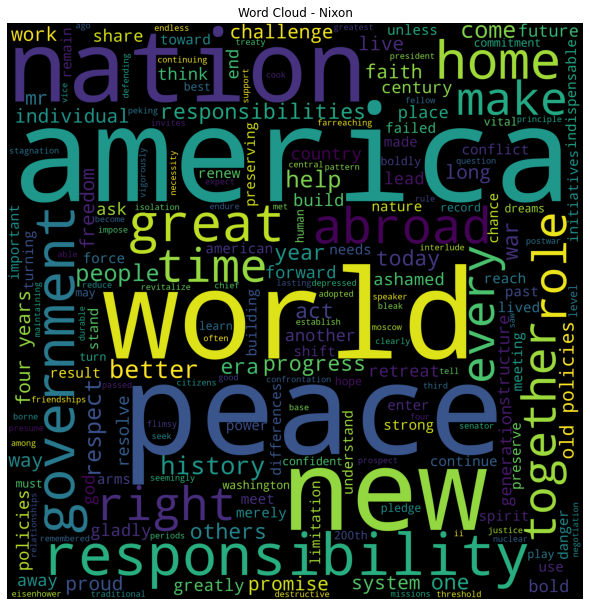

In [250]:
# Word Cloud 
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(ta["Speech"][2])
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.title("Word Cloud - Nixon")
plt.show()

_____